In [1]:
from enron_preprocess import (
    get_merged_enron_data,
)

[nltk_data] Downloading package punkt to E:/nltk...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
merged_enron_preprocess, merged_enron_preprocess_X, merged_enron_preprocess_y = get_merged_enron_data()

Preprocessed data saved to ./csv/preprocessed_merged_enron_data.csv.


Total number of words: 134275
Total number of words that appear less than 4 times
84168


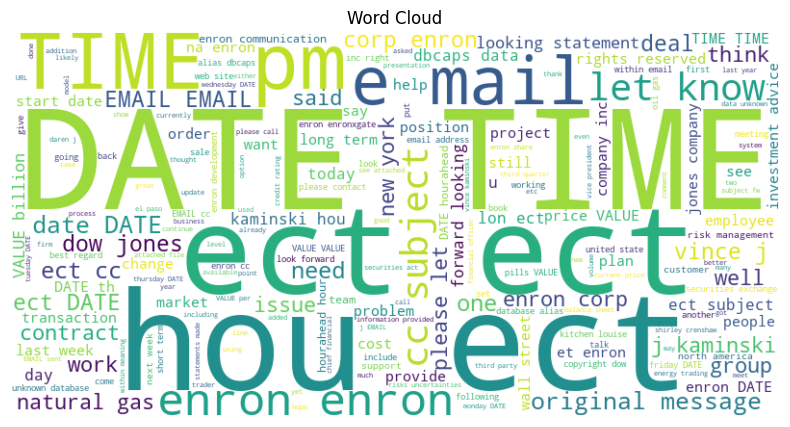

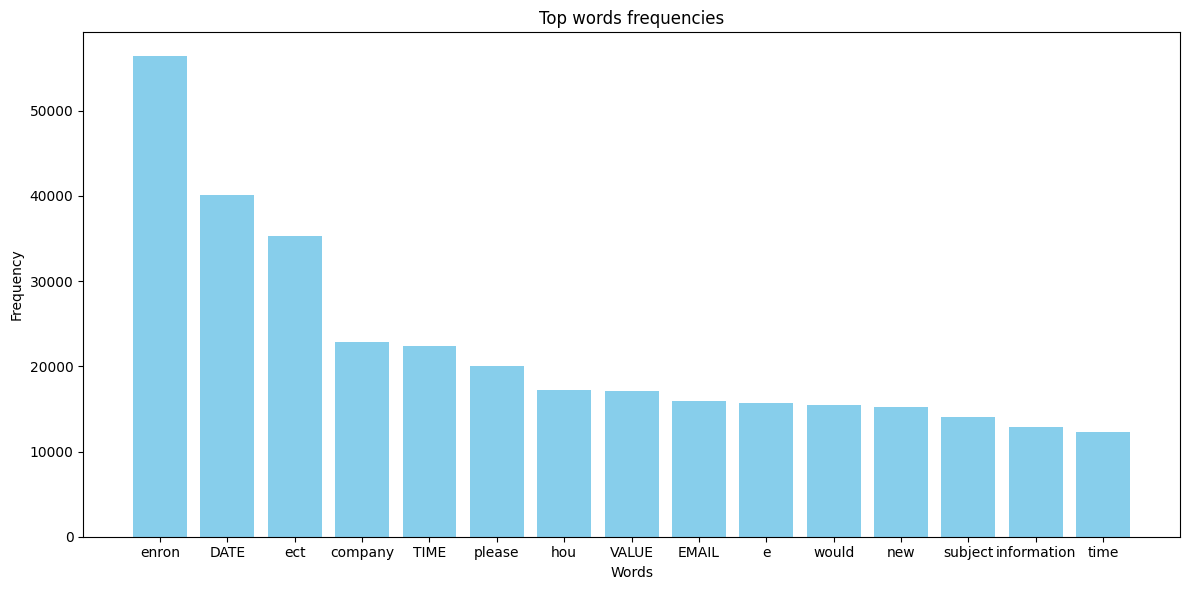

In [3]:
merged_enron_preprocess.visualize_wordcloud()
merged_enron_preprocess.visualize_bar_chart()

1    17170
0    16545
Name: Label, dtype: int64


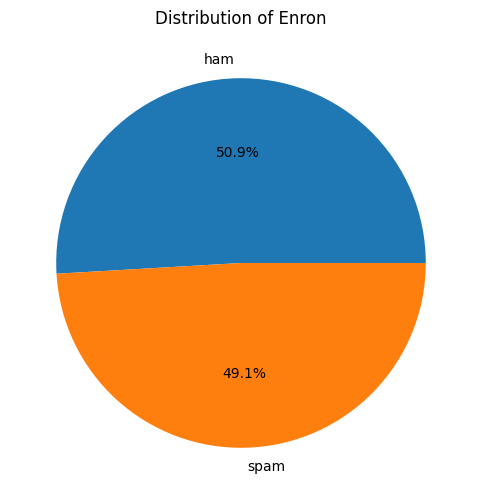

In [4]:
import matplotlib.pyplot as plt
import os

label_counts = merged_enron_preprocess_y.value_counts()

print(label_counts)

plt.figure(figsize=(8, 6))
plt.pie(label_counts.values, labels=["ham", "spam"], autopct='%1.1f%%')
plt.title('Distribution of Enron')
plt.savefig(os.path.join("./figs", "enron_pie_chart.jpg"))
plt.show()

In [5]:
from collections import Counter
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import ast

preprocessed_enron = pd.read_csv("./csv/preprocessed_merged_enron_data.csv")

data_label_0 = preprocessed_enron[preprocessed_enron['Label'] == 0]
data_label_1 = preprocessed_enron[preprocessed_enron['Label'] == 1]

preprocessed_enron_feature_label_0 = data_label_0["Text"].apply(lambda x: ast.literal_eval(x))
preprocessed_enron_feature_label_1 = data_label_1["Text"].apply(lambda x: ast.literal_eval(x))

preprocessed_enron_feature_label_0 = list(itertools.chain.from_iterable(preprocessed_enron_feature_label_0))
preprocessed_enron_feature_label_1 = list(itertools.chain.from_iterable(preprocessed_enron_feature_label_1))

word_freq_count_0 = Counter(preprocessed_enron_feature_label_0)
word_freq_count_1 = Counter(preprocessed_enron_feature_label_1)

most_common_0 = word_freq_count_0.most_common(17)
most_common_1 = word_freq_count_1.most_common(17)

del data_label_0, data_label_1, preprocessed_enron_feature_label_0, preprocessed_enron_feature_label_1, word_freq_count_0, word_freq_count_1

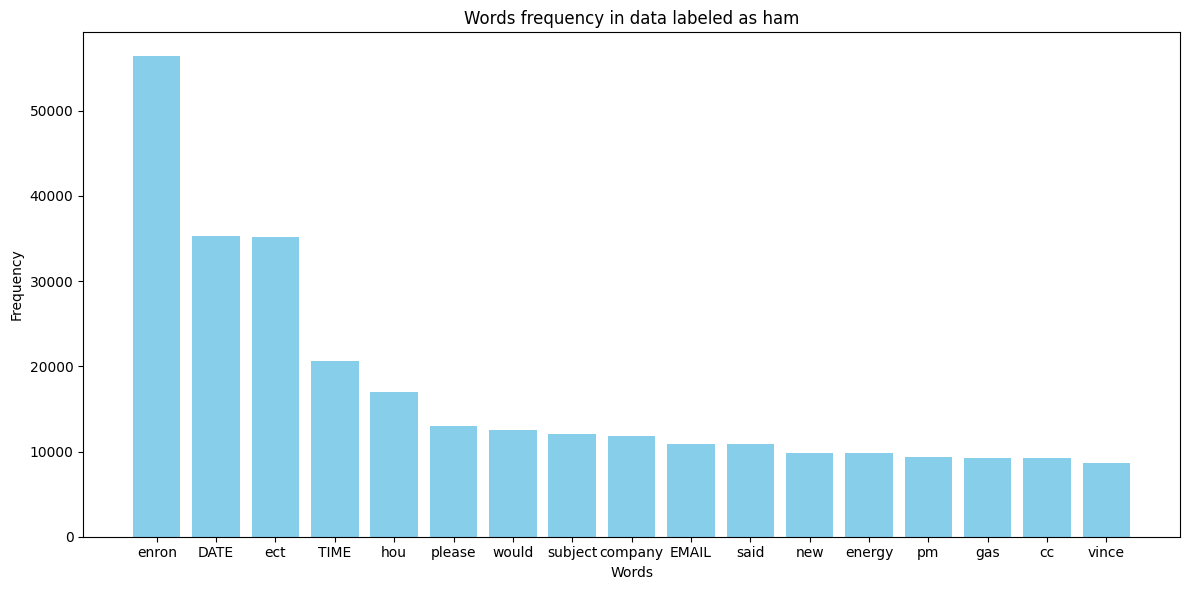

In [6]:
words, counts = zip(*most_common_0)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color="skyblue")
plt.title("Words frequency in data labeled as ham")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

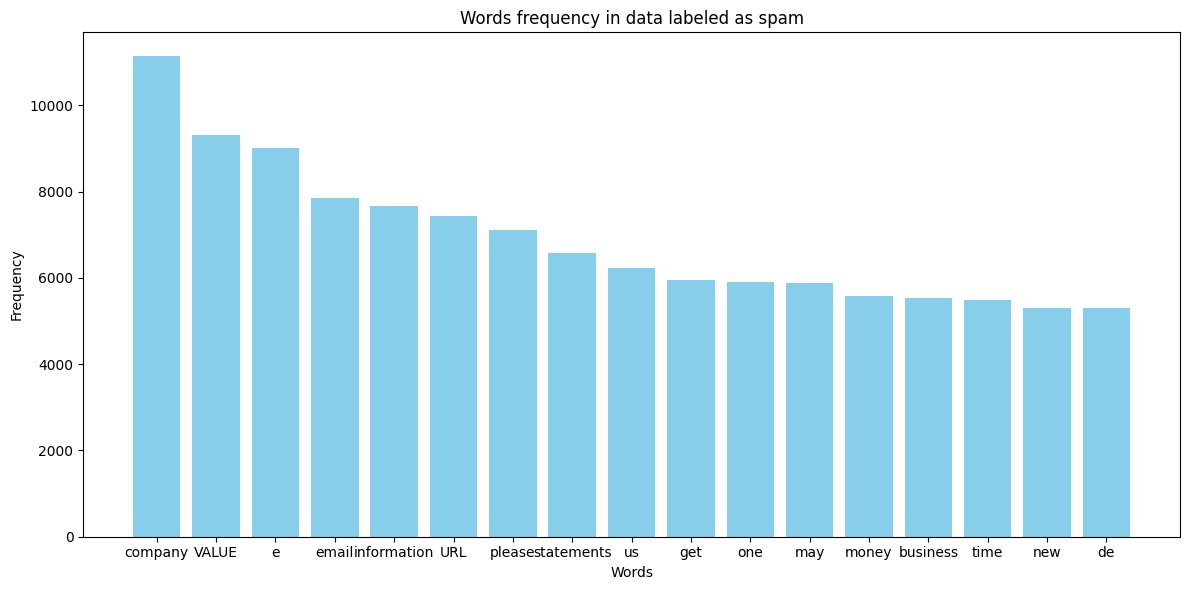

In [7]:
words, counts = zip(*most_common_1)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color="skyblue")
plt.title("Words frequency in data labeled as spam")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()